In [1]:
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

In [2]:
dataset = np.loadtxt("dataset.csv", delimiter=',', dtype = np.float32)
np.random.shuffle(dataset)

In [3]:
dataset.shape

(2192, 8)

In [4]:
training_dataset = dataset[0:2000]
testing_dataset = dataset[2000:]

In [5]:
class dataset (Dataset):
    def __init__(self,data,label):
        self.data = data
        self.label = label
    def __len__(self):
        return len(self.data)
    def __getitem__(self,idx):
        return self.data[idx],self.label[idx]
data_set = dataset(training_dataset[:,:-1],training_dataset[:,-1])
dataloader = DataLoader(data_set,batch_size=50,shuffle = True)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
#creating the model for prediction part
class Prediction_Model(nn.Module):
    def __init__(self):
        super(Prediction_Model,self).__init__()
        self.l1 = nn.Linear(7,100)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(100,50)
        self.l3 = nn.Linear(50,25)
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        return out

model = Prediction_Model().to(device)

In [16]:
#training area
loss = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(),lr = 0.0001)
training_loss = []
testing_loss = []
epoch = []
for e in range(1000):
    net_training_loss = 0.0
    net_iteration = 0
    for i,(data,label) in enumerate(dataloader):
        label = label.view(50,1)
        target = torch.zeros(50,25,dtype = torch.float32)
        for j in range(50):
            target[j][int(label[j]) - 1] = 10.0
        optim.zero_grad()
        data = data.to(device)
        target = target.to(device)
        label = label.to(device)
        prediction = model.forward(data)
        l = loss(prediction,target)
        l.backward()
        optim.step()
        net_training_loss += l.item()
        net_iteration += 1
    trainingloss = net_training_loss/net_iteration
    training_loss.append(trainingloss)
    epoch.append(e)
    net_testing_loss = 0.0
    net_iteration = 0
    for datas in testing_dataset:
        data = torch.from_numpy(datas[:-1]).view(1,7).to(device)
        label = datas[-1]
        target = torch.zeros(1,25,dtype = torch.float32).to(device)
        target[0][int(label) - 1] = 10.0
        net_testing_loss += loss(model.forward(data),target).item()
        net_iteration += 1
    testingloss = net_testing_loss/net_iteration
    testing_loss.append(testingloss)
    if((testingloss - trainingloss)/trainingloss > 0.5):
      print("overtraining")
      break
    print(f"epoch {e} training loss {trainingloss} testing loss {testingloss}")

epoch 0 training loss 42.750621747970584 testing loss 34.81113886833191
epoch 1 training loss 29.70679669380188 testing loss 25.748137788226206
epoch 2 training loss 22.42227840423584 testing loss 19.456149585545063
epoch 3 training loss 17.465942001342775 testing loss 15.446893617510796
epoch 4 training loss 14.333576321601868 testing loss 13.045474967608849
epoch 5 training loss 12.309881734848023 testing loss 11.363321791713437
epoch 6 training loss 10.813123536109924 testing loss 10.008440469702085
epoch 7 training loss 9.601124894618987 testing loss 8.91627862645934
epoch 8 training loss 8.649510419368744 testing loss 8.086077600717545
epoch 9 training loss 7.848316669464111 testing loss 7.313291476573795
epoch 10 training loss 7.119713437557221 testing loss 6.639004891583075
epoch 11 training loss 6.526577377319336 testing loss 6.126161135965958
epoch 12 training loss 6.067264306545257 testing loss 5.689094045199454
epoch 13 training loss 5.633612263202667 testing loss 5.27267011

In [18]:
#saving the model
# torch.save(model,"user_interface/model/agriculture_yield_prediction")
model_scripted = torch.jit.script(model) # Export to TorchScript
model_scripted.save('crop_recommendation.pt')

In [ ]:
#loading model
loadmodel = torch.jit.load("user_interface/model/crop_recommendation.pt")
loadmodel.eval()

RecursiveScriptModule(
  original_name=Prediction_Model
  (l1): RecursiveScriptModule(original_name=Linear)
  (relu): RecursiveScriptModule(original_name=ReLU)
  (l2): RecursiveScriptModule(original_name=Linear)
  (l3): RecursiveScriptModule(original_name=Linear)
)

In [ ]:
_,pred = torch.max(loadmodel.forward(torch.from_numpy(testing_dataset[0, : -1]).view(1,7)),1)
print(pred+1)
print(testing_dataset[0,-1])

tensor([2])
2.0


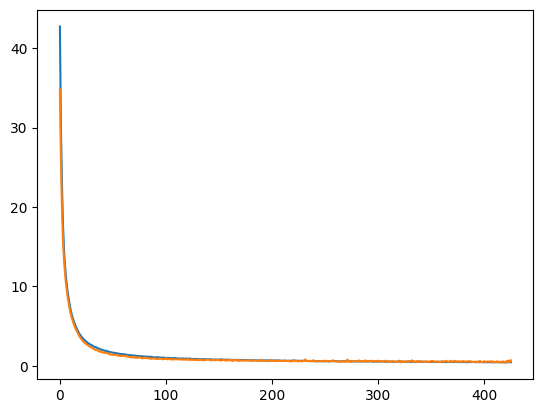

In [19]:
import matplotlib.pyplot as plt
plt.plot(epoch,training_loss)
plt.plot(epoch,testing_loss)
plt.show()

In [ ]:
#random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators = 40, max_depth = 14)

x_train,y_train = training_dataset[:,:-1],training_dataset[:,-1]
x_test,y_test = testing_dataset[:,:-1],testing_dataset[:,-1]

model2.fit(x_train,y_train)

RandomForestClassifier(max_depth=14, n_estimators=40)

In [ ]:
model2.score(x_test,y_test)

0.9895833333333334

In [ ]:
model2.score(x_train,y_train)

1.0

In [ ]:
#irrigation suggestion

In [20]:
dataset = np.loadtxt("dataset.csv", delimiter=',', dtype = np.float32)
np.random.shuffle(dataset)

In [21]:
dataset.shape

(501, 6)

In [22]:
training_dataset = dataset[0:450]
testing_dataset = dataset[450:]

In [23]:
class dataset (Dataset):
    def __init__(self,data,label):
        self.data = data
        self.label = label
    def __len__(self):
        return len(self.data)
    def __getitem__(self,idx):
        return self.data[idx],self.label[idx]
data_set = dataset(training_dataset[:,:-1],training_dataset[:,-1])
dataloader = DataLoader(data_set,batch_size=50,shuffle = True)

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [30]:
#creating the model for prediction part
class Prediction_Model(nn.Module):
    def __init__(self):
        super(Prediction_Model,self).__init__()
        self.l1 = nn.Linear(5,100)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(100,50)
        self.l3 = nn.Linear(50,2)
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        return out

model = Prediction_Model().to(device)

In [31]:
#training area
loss = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(),lr = 0.0001)
training_loss = []
testing_loss = []
epoch = []
overtraining = 0
for e in range(1000):
    net_training_loss = 0.0
    net_iteration = 0
    for i,(data,label) in enumerate(dataloader):
        label = label.view(50,1)
        target = torch.zeros(50,2,dtype = torch.float32)
        for j in range(50):
            target[j][int(label[j]) - 1] = 10.0
        optim.zero_grad()
        data = data.to(device)
        target = target.to(device)
        label = label.to(device)
        prediction = model.forward(data)
        l = loss(prediction,target)
        l.backward()
        optim.step()
        net_training_loss += l.item()
        net_iteration += 1
    trainingloss = net_training_loss/net_iteration
    training_loss.append(trainingloss)
    epoch.append(e)
    net_testing_loss = 0.0
    net_iteration = 0
    for datas in testing_dataset:
        data = torch.from_numpy(datas[:-1]).view(1,5).to(device)
        label = datas[-1]
        target = torch.zeros(1,2,dtype = torch.float32).to(device)
        target[0][int(label) - 1] = 10.0
        net_testing_loss += loss(model.forward(data),target).item()
        net_iteration += 1
    testingloss = net_testing_loss/net_iteration
    testing_loss.append(testingloss)
    if((testingloss - trainingloss)/trainingloss > 0.5):
      print("overtraining")
      break

    print(f"epoch {e} training loss {trainingloss} testing loss {testingloss}")

epoch 0 training loss 59.394510693020294 testing loss 24.722022611408836
epoch 1 training loss 11.931183920966255 testing loss 14.354283160420463
epoch 2 training loss 8.9569075372484 testing loss 10.465232101588638
epoch 3 training loss 6.778367625342475 testing loss 5.746680589940618
epoch 4 training loss 5.232826603783502 testing loss 5.424766760940353
epoch 5 training loss 4.829855680465698 testing loss 6.410290052493413
epoch 6 training loss 4.643523030810886 testing loss 5.194406346764927
epoch 7 training loss 4.187028646469116 testing loss 5.561447943031204
epoch 8 training loss 4.187748908996582 testing loss 5.135017992088608
epoch 9 training loss 3.978425979614258 testing loss 5.121261278349979
epoch 10 training loss 3.877664883931478 testing loss 5.118209959902599
epoch 11 training loss 3.77791166305542 testing loss 4.90764392959867
epoch 12 training loss 3.7814278337690563 testing loss 5.303641311532142
epoch 13 training loss 3.6637806362575955 testing loss 4.831115148267617

In [ ]:
#saving the model
# torch.save(model,"user_interface/model/agriculture_yield_prediction")
model_scripted = torch.jit.script(model) # Export to TorchScript
model_scripted.save('irrigation.pt')

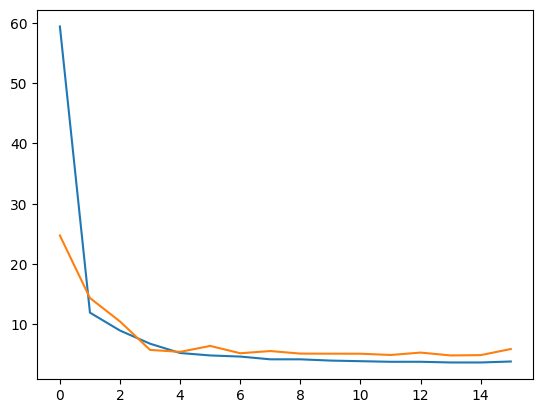

In [32]:
import matplotlib.pyplot as plt
plt.plot(epoch,training_loss)
plt.plot(epoch,testing_loss)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators = 40, max_depth = 14)

x_train,y_train = training_dataset[:,:-1],training_dataset[:,-1]
x_test,y_test = testing_dataset[:,:-1],testing_dataset[:,-1]

model2.fit(x_train,y_train)

RandomForestClassifier(max_depth=14, n_estimators=40)

In [ ]:
model2.score(x_test,y_test)

0.9411764705882353

In [ ]:
import joblib
joblib.dump(model2,"irrigation.rn")

['irrigation.rn']

In [ ]:
loadmodel = torch.jit.load("irrigation.pt")
loadmodel.eval()

RecursiveScriptModule(
  original_name=Prediction_Model
  (l1): RecursiveScriptModule(original_name=Linear)
  (relu): RecursiveScriptModule(original_name=ReLU)
  (l2): RecursiveScriptModule(original_name=Linear)
  (l3): RecursiveScriptModule(original_name=Linear)
)

In [ ]:
#for fertilizer

In [ ]:
dataset = np.loadtxt("dataset.csv", delimiter=',', dtype = np.float32)
np.random.shuffle(dataset)

In [ ]:
dataset.shape

(98, 9)

In [ ]:
training_dataset = dataset[0:80]
testing_dataset = dataset[80:]

In [ ]:
class dataset (Dataset):
    def __init__(self,data,label):
        self.data = data
        self.label = label
    def __len__(self):
        return len(self.data)
    def __getitem__(self,idx):
        return self.data[idx],self.label[idx]
data_set = dataset(training_dataset[:,:-1],training_dataset[:,-1])
dataloader = DataLoader(data_set,batch_size=10,shuffle = True)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
#creating the model for prediction part
class Prediction_Model(nn.Module):
    def __init__(self):
        super(Prediction_Model,self).__init__()
        self.l1 = nn.Linear(8,100)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(100,50)
        self.l3 = nn.Linear(50,7)
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        return out

model = Prediction_Model().to(device)

In [ ]:
#training area
loss = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(),lr = 0.0001)
training_loss = []
testing_loss = []
epoch = []
overtraining = 0
for e in range(1000):
    net_training_loss = 0.0
    net_iteration = 0
    for i,(data,label) in enumerate(dataloader):
        label = label.view(10,1)
        target = torch.zeros(10,7,dtype = torch.float32)
        for j in range(10):
            target[j][int(label[j]) - 1] = 10.0
        optim.zero_grad()
        data = data.to(device)
        target = target.to(device)
        label = label.to(device)
        prediction = model.forward(data)
        l = loss(prediction,target)
        l.backward()
        optim.step()
        net_training_loss += l.item()
        net_iteration += 1
    trainingloss = net_training_loss/net_iteration
    training_loss.append(trainingloss)
    epoch.append(e)
    net_testing_loss = 0.0
    net_iteration = 0
    for datas in testing_dataset:
        data = torch.from_numpy(datas[:-1]).view(1,8).to(device)
        label = datas[-1]
        target = torch.zeros(1,7,dtype = torch.float32).to(device)
        target[0][int(label) - 1] = 10.0
        net_testing_loss += loss(model.forward(data),target).item()
        net_iteration += 1
    testingloss = net_testing_loss/net_iteration
    testing_loss.append(testingloss)
    if(float(testingloss-trainingloss)/float(trainingloss) > 0.5):
      print("overtraining")
      overtraining += 1
    if(overtraining >= 50):
      print("overtraining level breach")
      break

    print(f"epoch {e} training loss {trainingloss} testing loss {testingloss}")

epoch 0 training loss 2.4803342670202255 testing loss 2.366832015415033
epoch 1 training loss 2.5392807722091675 testing loss 2.7592054713103504
epoch 2 training loss 2.3573877066373825 testing loss 2.277825721849998
epoch 3 training loss 2.2646565586328506 testing loss 2.1165054556396274
epoch 4 training loss 2.202798143029213 testing loss 2.104350979129473
epoch 5 training loss 2.144139051437378 testing loss 2.1843493771221905
epoch 6 training loss 2.099501982331276 testing loss 2.1067008694840803
epoch 7 training loss 2.064004570245743 testing loss 2.021101654817661
epoch 8 training loss 2.0154567062854767 testing loss 1.9756128860430584
epoch 9 training loss 1.9706119447946548 testing loss 1.965729333874252
epoch 10 training loss 1.9456644505262375 testing loss 2.042620408245259
epoch 11 training loss 1.8868754878640175 testing loss 1.9884618293080065
epoch 12 training loss 1.8422968685626984 testing loss 1.9431807106981676
epoch 13 training loss 1.800597295165062 testing loss 1.84

In [ ]:
#saving the model
# torch.save(model,"user_interface/model/agriculture_yield_prediction")
model = model.to(torch.device('cpu'))
model_scripted = torch.jit.script(model) # Export to TorchScript
model_scripted.save('fertilizer.pt')

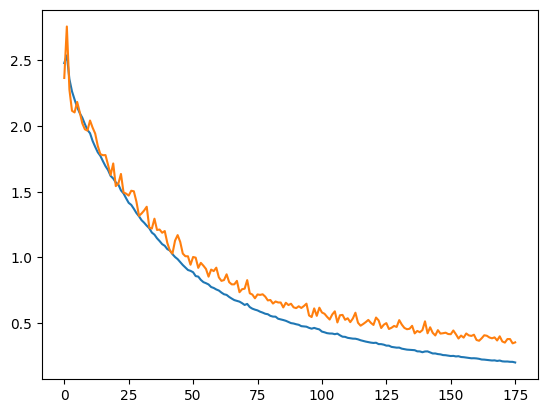

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epoch,training_loss)
plt.plot(epoch,testing_loss)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators = 40, max_depth = 12)

x_train,y_train = training_dataset[:,:-1],training_dataset[:,-1]
x_test,y_test = testing_dataset[:,:-1],testing_dataset[:,-1]

model2.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, n_estimators=40)

In [ ]:
model2.score(x_test,y_test)

0.9444444444444444

In [ ]:
import joblib
joblib.dump(model2,"fertilizer.rn")

['fertilizer.rn']

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(model2.predict(x_test),y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00         3
         2.0       1.00      1.00      1.00         1
         3.0       1.00      1.00      1.00         5
         4.0       0.00      0.00      0.00         1
         6.0       0.67      1.00      0.80         2

    accuracy                           0.94        18
   macro avg       0.78      0.83      0.80        18
weighted avg       0.91      0.94      0.92        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
